In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Análise de Risco de Crédito

## Objetivo do Dataset

Neste notebook, vamos explorar o dataset de risco de crédito para entender os fatores que influenciam a concessão de crédito e identificar potenciais riscos associados aos empréstimos. Vamos realizar uma análise exploratória dos dados e transformar as colunas do dataset para facilitar a compreensão.


In [164]:
# Carregar o dataset
url = 'credit_risk_dataset.csv'  
df = pd.read_csv(url)

# Exibir as primeiras linhas do dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Descrição do Dataset

Vamos utilizar a função `describe()` para obter uma visão geral estatística do nosso dataset.


In [165]:
# Descrição estatística do dataset
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Transformação do Dataset para Português

Vamos renomear as colunas do dataset para o idioma português para facilitar a análise.


In [166]:
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [167]:
# Renomear as colunas para português
colunas_novas = {
    'person_age': 'Idade',
    'person_income': 'Renda',
    'person_home_ownership': 'Propriedade_Casa',
    'person_emp_length': 'Tempo_Emprego',
    'loan_intent': 'Intenção_Empréstimo',
    'loan_grade': 'Nota_Empréstimo',
    'loan_amnt': 'Valor_Empréstimo',
    'loan_int_rate': 'Taxa_Juros',
    'loan_status': 'Status_Empréstimo',
    'loan_percent_income': 'Percentual_Renda_Empréstimo',
    'cb_person_default_on_file': 'Default_Pessoa_Cadastro',
    'cb_person_cred_hist_length': 'Histórico_Crédito'
}

df.rename(columns=colunas_novas, inplace=True)

# Exibir as primeiras linhas do DataFrame com as colunas renomeadas
df.head()


,Idade,Renda,Propriedade_Casa,Tempo_Emprego,Intenção_Empréstimo,Nota_Empréstimo,Valor_Empréstimo,Taxa_Juros,Status_Empréstimo,Percentual_Renda_Empréstimo,Default_Pessoa_Cadastro,Histórico_Crédito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Análise Exploratória dos Dados (EDA)

Vamos realizar uma análise exploratória dos dados para entender as características quantitativas e qualitativas.


## Análise Quantitativa

### Dados Discretos e Contínuos

In [168]:
# Dados Discretos: Tempo de Emprego (anos)
print("Contagem de Tempo de Emprego:")
print(df['Tempo_Emprego'].value_counts())


Contagem de Tempo de Emprego:
Tempo_Emprego
0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64


In [169]:
# Dados Contínuos: Renda e Valor do Empréstimo
print("Estatísticas descritivas da Renda:")
print(df['Renda'].describe())

print("Estatísticas descritivas do Valor do Empréstimo:")
print(df['Valor_Empréstimo'].describe())

Estatísticas descritivas da Renda:
count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: Renda, dtype: float64
Estatísticas descritivas do Valor do Empréstimo:
count    32581.000000
mean      9589.371106
std       6322.086646
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: Valor_Empréstimo, dtype: float64


### Análise Qualitativa

### Dados Nominais e Ordinais



In [170]:
# Dados nominais: Propriedade da Casa, Status de Empréstimo e Default no Cadastro
print("Distribuição da Propriedade da Casa:")
print(df['Propriedade_Casa'].value_counts())

print("Distribuição do Status de Empréstimo:")
print(df['Status_Empréstimo'].value_counts())

print("Distribuição do Default de Pessoa no Cadastro:")
print(df['Default_Pessoa_Cadastro'].value_counts())


Distribuição da Propriedade da Casa:
Propriedade_Casa
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
Distribuição do Status de Empréstimo:
Status_Empréstimo
0    25473
1     7108
Name: count, dtype: int64
Distribuição do Default de Pessoa no Cadastro:
Default_Pessoa_Cadastro
N    26836
Y     5745
Name: count, dtype: int64


In [171]:
# Dados ordinais: Nota do Empréstimo e Intenção do Empréstimo
print("Distribuição da Nota do Empréstimo:")
print(df['Nota_Empréstimo'].value_counts())

print("Distribuição da Intenção do Empréstimo:")
print(df['Intenção_Empréstimo'].value_counts())

Distribuição da Nota do Empréstimo:
Nota_Empréstimo
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
Distribuição da Intenção do Empréstimo:
Intenção_Empréstimo
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


## Pesquisa sobre Termos Estatísticos

- **Quartil:** Divisões do conjunto de dados em quatro partes iguais.
- **Percentil:** Divisões do conjunto de dados em 100 partes iguais.
- **Média:** A soma dos valores dividida pelo número total de valores.
- **Mediana:** O valor central quando os dados estão ordenados.


## Descrição Estatística

In [172]:
# Descrição estatística do DataFrame
print(df.describe(include='all'))


               Idade         Renda Propriedade_Casa  Tempo_Emprego  \
count   32581.000000  3.258100e+04            32581   31686.000000   
unique           NaN           NaN                4            NaN   
top              NaN           NaN             RENT            NaN   
freq             NaN           NaN            16446            NaN   
mean       27.734600  6.607485e+04              NaN       4.789686   
std         6.348078  6.198312e+04              NaN       4.142630   
min        20.000000  4.000000e+03              NaN       0.000000   
25%        23.000000  3.850000e+04              NaN       2.000000   
50%        26.000000  5.500000e+04              NaN       4.000000   
75%        30.000000  7.920000e+04              NaN       7.000000   
max       144.000000  6.000000e+06              NaN     123.000000   

       Intenção_Empréstimo Nota_Empréstimo  Valor_Empréstimo    Taxa_Juros  \
count                32581           32581      32581.000000  29465.000000   
uni

In [173]:
# Estatísticas do Status de Empréstimo
print(df['Status_Empréstimo'].value_counts(normalize=True))

# Exibir a média e mediana da Renda
print("Média da Renda:", df['Renda'].mean())
print("Mediana da Renda:", df['Renda'].median())

# Exibir os quartis da Renda
print("Quartis da Renda:")
print(df['Renda'].quantile([0.25, 0.5, 0.75]))

# Exibir percentis específicos da Renda
percentil_90 = df['Renda'].quantile(0.90)
print("Percentil 90 da Renda:", percentil_90)


Status_Empréstimo
0    0.781836
1    0.218164
Name: proportion, dtype: float64
Média da Renda: 66074.84846996715
Mediana da Renda: 55000.0
Quartis da Renda:
0.25    38500.0
0.50    55000.0
0.75    79200.0
Name: Renda, dtype: float64
Percentil 90 da Renda: 110004.0


### Análise de Risco

#### Quais pessoas ganham acima do máximo e mínimo?


In [174]:
# Identificar valores máximos e mínimos de Renda
max_renda = df['Renda'].max()
min_renda = df['Renda'].min()

# Pessoas que ganham acima do máximo e mínimo
pessoas_acima_max = df[df['Renda'] > max_renda]
pessoas_abaixo_min = df[df['Renda'] < min_renda]

print("Pessoas que ganham acima do máximo:", pessoas_acima_max)
print("Pessoas que ganham abaixo do mínimo:", pessoas_abaixo_min)


Pessoas que ganham acima do máximo: Empty DataFrame
Columns: [Idade, Renda, Propriedade_Casa, Tempo_Emprego, Intenção_Empréstimo, Nota_Empréstimo, Valor_Empréstimo, Taxa_Juros, Status_Empréstimo, Percentual_Renda_Empréstimo, Default_Pessoa_Cadastro, Histórico_Crédito]
Index: []
Pessoas que ganham abaixo do mínimo: Empty DataFrame
Columns: [Idade, Renda, Propriedade_Casa, Tempo_Emprego, Intenção_Empréstimo, Nota_Empréstimo, Valor_Empréstimo, Taxa_Juros, Status_Empréstimo, Percentual_Renda_Empréstimo, Default_Pessoa_Cadastro, Histórico_Crédito]
Index: []


#### Quais pessoas têm risco em emprestar?


In [175]:
# Filtrar pessoas com status de empréstimo 'denied'
pessoas_risco = df[df['Status_Empréstimo'] == 'denied']

print("Pessoas com risco em emprestar:")
print(pessoas_risco)


Pessoas com risco em emprestar:
Empty DataFrame
Columns: [Idade, Renda, Propriedade_Casa, Tempo_Emprego, Intenção_Empréstimo, Nota_Empréstimo, Valor_Empréstimo, Taxa_Juros, Status_Empréstimo, Percentual_Renda_Empréstimo, Default_Pessoa_Cadastro, Histórico_Crédito]
Index: []


## Funções Básicas do Pandas

Vamos explorar algumas funções básicas do pandas utilizadas na análise.


### Retorne o DataFrame da última aula com as duas primeiras linhas como amostras.

In [205]:
credit_risk = df.head(2)

credit_risk

,Idade,Renda,Propriedade_Casa,Tempo_Emprego,Intenção_Empréstimo,Nota_Empréstimo,Valor_Empréstimo,Taxa_Juros,Status_Empréstimo,Percentual_Renda_Empréstimo,Default_Pessoa_Cadastro,Histórico_Crédito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


### Retorne uma tupla com o número de linhas e colunas

In [208]:
credit_risk.shape

(2, 12)

### Retorne as informações apenas da coluna renda

In [210]:
credit_risk['Renda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2 entries, 0 to 1
Series name: Renda
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 148.0 bytes


### Mostre os tipos com dtypes

In [211]:
credit_risk.dtypes

Idade                            int64
Renda                            int64
Propriedade_Casa                object
Tempo_Emprego                  float64
Intenção_Empréstimo             object
Nota_Empréstimo                 object
Valor_Empréstimo                 int64
Taxa_Juros                     float64
Status_Empréstimo                int64
Percentual_Renda_Empréstimo    float64
Default_Pessoa_Cadastro         object
Histórico_Crédito                int64
dtype: object

# Informações sobre o DataFrame

In [176]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        32581 non-null  int64  
 1   Renda                        32581 non-null  int64  
 2   Propriedade_Casa             32581 non-null  object 
 3   Tempo_Emprego                31686 non-null  float64
 4   Intenção_Empréstimo          32581 non-null  object 
 5   Nota_Empréstimo              32581 non-null  object 
 6   Valor_Empréstimo             32581 non-null  int64  
 7   Taxa_Juros                   29465 non-null  float64
 8   Status_Empréstimo            32581 non-null  int64  
 9   Percentual_Renda_Empréstimo  32581 non-null  float64
 10  Default_Pessoa_Cadastro      32581 non-null  object 
 11  Histórico_Crédito            32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


# Visualizar últimas 5 linhas

In [177]:
df.tail(5)

,Idade,Renda,Propriedade_Casa,Tempo_Emprego,Intenção_Empréstimo,Nota_Empréstimo,Valor_Empréstimo,Taxa_Juros,Status_Empréstimo,Percentual_Renda_Empréstimo,Default_Pessoa_Cadastro,Histórico_Crédito
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


# Verificar a quantidade de valores nulos por coluna

In [185]:
df.rename(columns=colunas_novas, inplace=True)
print("Valores nulos antes do tratamento:")
print(df.isnull().sum())

Valores nulos antes do tratamento:
Idade                             0
Renda                             0
Propriedade_Casa                  0
Tempo_Emprego                   895
Intenção_Empréstimo               0
Nota_Empréstimo                   0
Valor_Empréstimo                  0
Taxa_Juros                     3116
Status_Empréstimo                 0
Percentual_Renda_Empréstimo       0
Default_Pessoa_Cadastro           0
Histórico_Crédito                 0
dtype: int64


# Substituir valores nulos

# por média

In [200]:
df['Tempo_Emprego'] = df['Tempo_Emprego'].fillna(df['Tempo_Emprego'].mean())
df['Taxa_Juros'] = df['Taxa_Juros'].fillna(df['Taxa_Juros'].mean())

por moda

# Verificar após o tratamento

In [202]:
print("Valores nulos após o tratamento:")
print(df.isnull().sum())

Valores nulos após o tratamento:
Idade                          0
Renda                          0
Propriedade_Casa               0
Tempo_Emprego                  0
Intenção_Empréstimo            0
Nota_Empréstimo                0
Valor_Empréstimo               0
Taxa_Juros                     0
Status_Empréstimo              0
Percentual_Renda_Empréstimo    0
Default_Pessoa_Cadastro        0
Histórico_Crédito              0
dtype: int64


### Criar categorias para a coluna 'Percentual_Renda_Empréstimo'

In [226]:
grafico_percent = credit_risk.groupby('Percentual_Renda_Empréstimo')['Tempo_Emprego'].sum().sort_values()

### Criar gráfico de barras

<Axes: xlabel='Percentual_Renda_Empréstimo', ylabel='Density'>

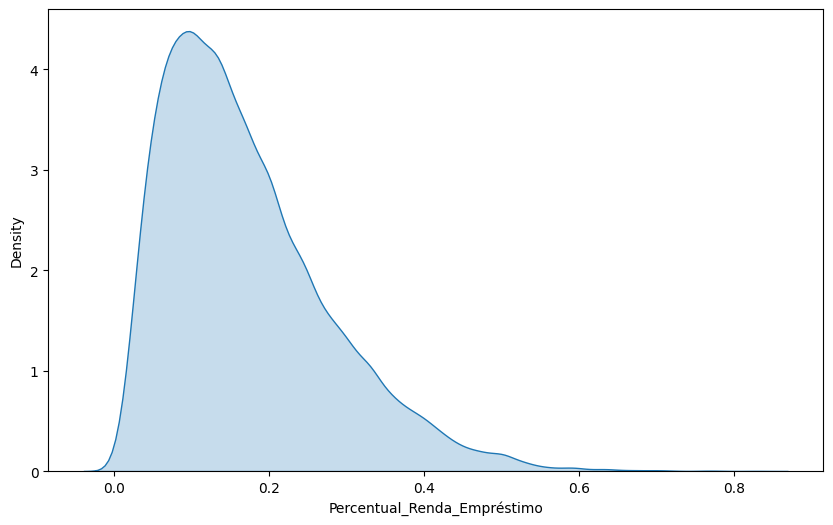

In [229]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Percentual_Renda_Empréstimo'], fill=True)